In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

In [5]:
# Load the CSV file into a Spark DataFrame
df = spark.read.csv("customer_purchase_data.csv", header=True, inferSchema=True)

In [6]:
# Perform data preprocessing and feature engineering
# (Handle missing values, clean data, and create features as needed)

# Exploratory Data Analysis (EDA)
# Calculate summary statistics
df.describe().show()

+-------+------------------+------------------------+-------------------+-----------------+
|summary|       Customer_ID|Days_Since_Last_Purchase|Number_of_Purchases|   Total_Spending|
+-------+------------------+------------------------+-------------------+-----------------+
|  count|                10|                      10|                 10|               10|
|   mean|               5.5|                    19.5|                4.8|            107.0|
| stddev|3.0276503540974917|       8.746427842267952| 2.0976176963403033|42.37399621885521|
|    min|                 1|                       8|                  2|               50|
|    max|                10|                      35|                  9|              200|
+-------+------------------+------------------------+-------------------+-----------------+



In [8]:
# Visualize distributions
# Example: Histogram of number of purchases
purchase_hist = df.select("Number_of_Purchases").rdd.flatMap(lambda x: x).histogram(10)
bin_edges = purchase_hist[0]
counts = purchase_hist[1]

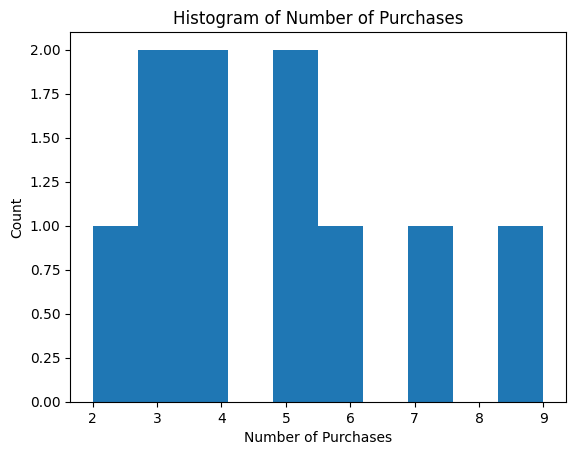

In [10]:
# Convert bin edges to bin centers for plotting
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0])
plt.title("Histogram of Number of Purchases")
plt.xlabel("Number of Purchases")
plt.ylabel("Count")
plt.show()

In [11]:
# Customer Segmentation
# Feature selection and vectorization
feature_cols = ["Days_Since_Last_Purchase", "Number_of_Purchases", "Total_Spending"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_vectorized = assembler.transform(df)

In [13]:
# Train K-means clustering model
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(df_vectorized)
clustered_df = model.transform(df_vectorized)

In [14]:
# Segment Profiling
# Analyze cluster centroids
cluster_centers = model.clusterCenters()
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} centroid: {centroid}")

Cluster 1 centroid: [ 23.5   5.5 115. ]
Cluster 2 centroid: [ 30.   7. 150.]
Cluster 3 centroid: [ 8.  2. 50.]
Cluster 4 centroid: [ 35.   9. 200.]
Cluster 5 centroid: [15.   3.8 88. ]


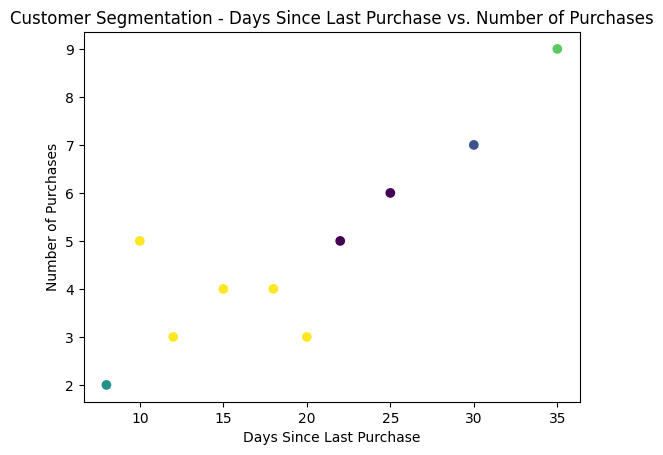

In [15]:
# Business Insights and Recommendations
# Generate visualizations and reports
# Example: Visualize clusters on a scatter plot
clustered_df_pd = clustered_df.select("Days_Since_Last_Purchase", "Number_of_Purchases", "Total_Spending", "prediction").toPandas()
plt.scatter(clustered_df_pd['Days_Since_Last_Purchase'], clustered_df_pd['Number_of_Purchases'], c=clustered_df_pd['prediction'])
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Purchases')
plt.title('Customer Segmentation - Days Since Last Purchase vs. Number of Purchases')
plt.show()